In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))
from common import common

In [2]:
%run ../datasets/cicids.ipynb

In [3]:
all_df, main_labels, config = get_processed_cicids_df()
all_df.head()

Normal class:  0    Benign
Name: ClassLabel, dtype: object
TARGET_DICT {0: 'Benign', 1: 'Botnet', 2: 'Bruteforce', 3: 'DDoS', 4: 'DoS', 5: 'Infiltration', 6: 'Portscan', 7: 'Webattack'}
NORMAL_TARGET 0
main_labels Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Var

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ClassLabel
0,51990738,3,1,43.0,6.0,31.0,14.333333,14.433757,6.0,6.00000,...,20,0.0,0.0,0.0,0.0,51940550.0,0.00,51940552.0,51940552.0,0
1,117384013,80,144,974.0,199741.0,275.0,12.175000,44.683636,1460.0,1387.09030,...,20,506187.0,628091.8,950315.0,62059.0,58155176.0,132745.16,58249039.0,58061309.0,0
2,246,2,2,64.0,204.0,32.0,32.000000,0.000000,102.0,102.00000,...,32,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
3,200929,13,11,1293.0,4610.0,694.0,99.461540,189.770750,1430.0,419.09090,...,20,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
4,2446230,8,7,1144.0,1581.0,677.0,143.000000,227.969920,1173.0,225.85715,...,20,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0


In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037240 entries, 0 to 2037239
Data columns (total 58 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Flow Duration             int64  
 1   Total Fwd Packets         int64  
 2   Total Backward Packets    int64  
 3   Fwd Packets Length Total  float64
 4   Bwd Packets Length Total  float64
 5   Fwd Packet Length Max     float64
 6   Fwd Packet Length Mean    float64
 7   Fwd Packet Length Std     float64
 8   Bwd Packet Length Max     float64
 9   Bwd Packet Length Mean    float64
 10  Bwd Packet Length Std     float64
 11  Flow Bytes/s              float64
 12  Flow Packets/s            float64
 13  Flow IAT Mean             float64
 14  Flow IAT Std              float64
 15  Flow IAT Max              float64
 16  Flow IAT Min              float64
 17  Fwd IAT Total             float64
 18  Fwd IAT Mean              float64
 19  Fwd IAT Std               float64
 20  Fwd IAT Max             

In [5]:
all_df.isnull().sum()

Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
Bwd Packets Length Total    0
Fwd Packet Length Max       0
Fwd Packet Length Mean      0
Fwd Packet Length Std       0
Bwd Packet Length Max       0
Bwd Packet Length Mean      0
Bwd Packet Length Std       0
Flow Bytes/s                0
Flow Packets/s              0
Flow IAT Mean               0
Flow IAT Std                0
Flow IAT Max                0
Flow IAT Min                0
Fwd IAT Total               0
Fwd IAT Mean                0
Fwd IAT Std                 0
Fwd IAT Max                 0
Fwd IAT Min                 0
Bwd IAT Total               0
Bwd IAT Mean                0
Bwd IAT Std                 0
Bwd IAT Max                 0
Bwd IAT Min                 0
Fwd PSH Flags               0
Fwd Header Length           0
Bwd Header Length           0
Fwd Packets/s               0
Bwd Packets/s               0
Packet Length Max           0
Packet Len

In [6]:
all_df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ClassLabel
count,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,...,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06
mean,1.605607e+07,4.027199e+01,1.034321e+01,2.029195e+03,1.180916e+04,2.946114e+02,8.130230e+01,1.042233e+02,6.061576e+02,1.999270e+02,...,-1.109164e+06,1.169638e+05,5.546788e+04,1.933034e+05,8.283509e+04,7.792835e+06,4.343689e+05,8.302553e+06,7.359161e+06,6.709754e-01
std,5.864290e+08,2.054067e+03,7.123964e+02,7.223378e+04,1.577816e+06,4.995259e+02,1.416223e+02,1.978874e+02,1.179677e+03,3.786199e+02,...,3.430893e+07,1.484188e+06,8.686173e+05,1.998240e+06,1.274295e+06,2.498225e+08,1.784730e+08,6.055233e+08,2.323143e+07,1.340969e+00
min,-8.282200e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.156200e+04,2.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00,2.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.951690e+05,3.000000e+00,2.000000e+00,9.700000e+01,2.320000e+02,5.500000e+01,4.400000e+01,1.154701e+01,1.510000e+02,1.080000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.553922e+06,7.000000e+00,5.000000e+00,9.350000e+02,9.640000e+02,5.090000e+02,1.076667e+02,1.807106e+02,9.640000e+02,2.163750e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,2.488000e+05,2.919220e+05,4.176568e+07,6.554530e+08,3.436800e+04,8.254954e+03,7.633714e+03,3.796000e+04,5.011060e+03,...,1.480000e+03,1.120000e+08,7.495335e+07,1.120000e+08,1.120000e+08,3.553386e+11,2.547013e+11,8.637480e+11,1.506900e+10,7.000000e+00


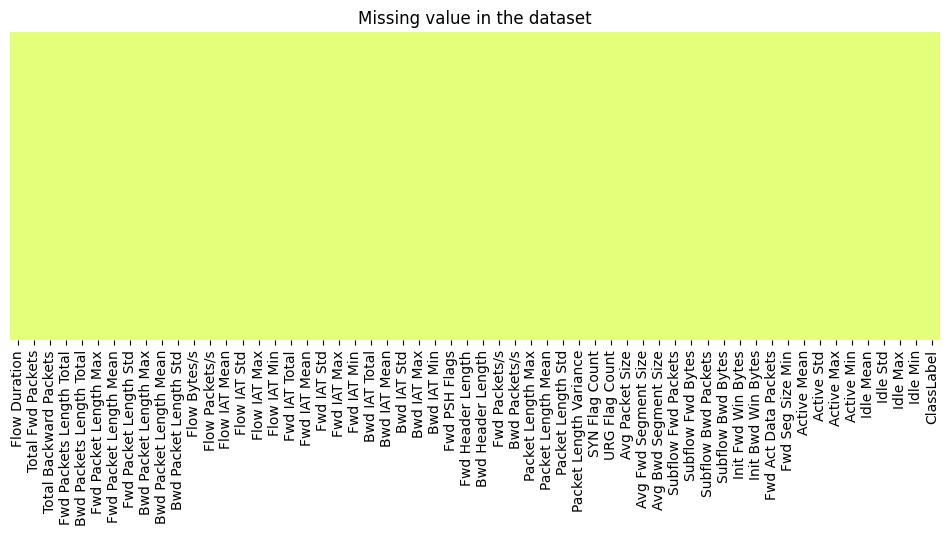

In [7]:
common.show_missing_values(all_df)

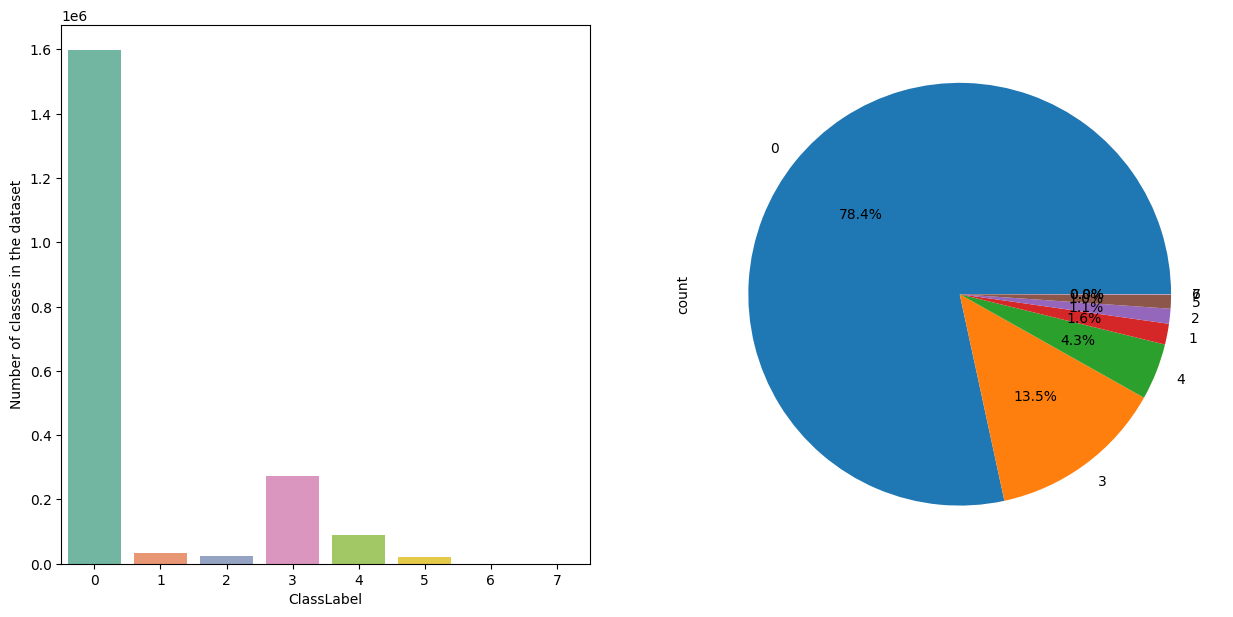

In [8]:
common.show_target_values(all_df, config['TARGET_COLUMN'])

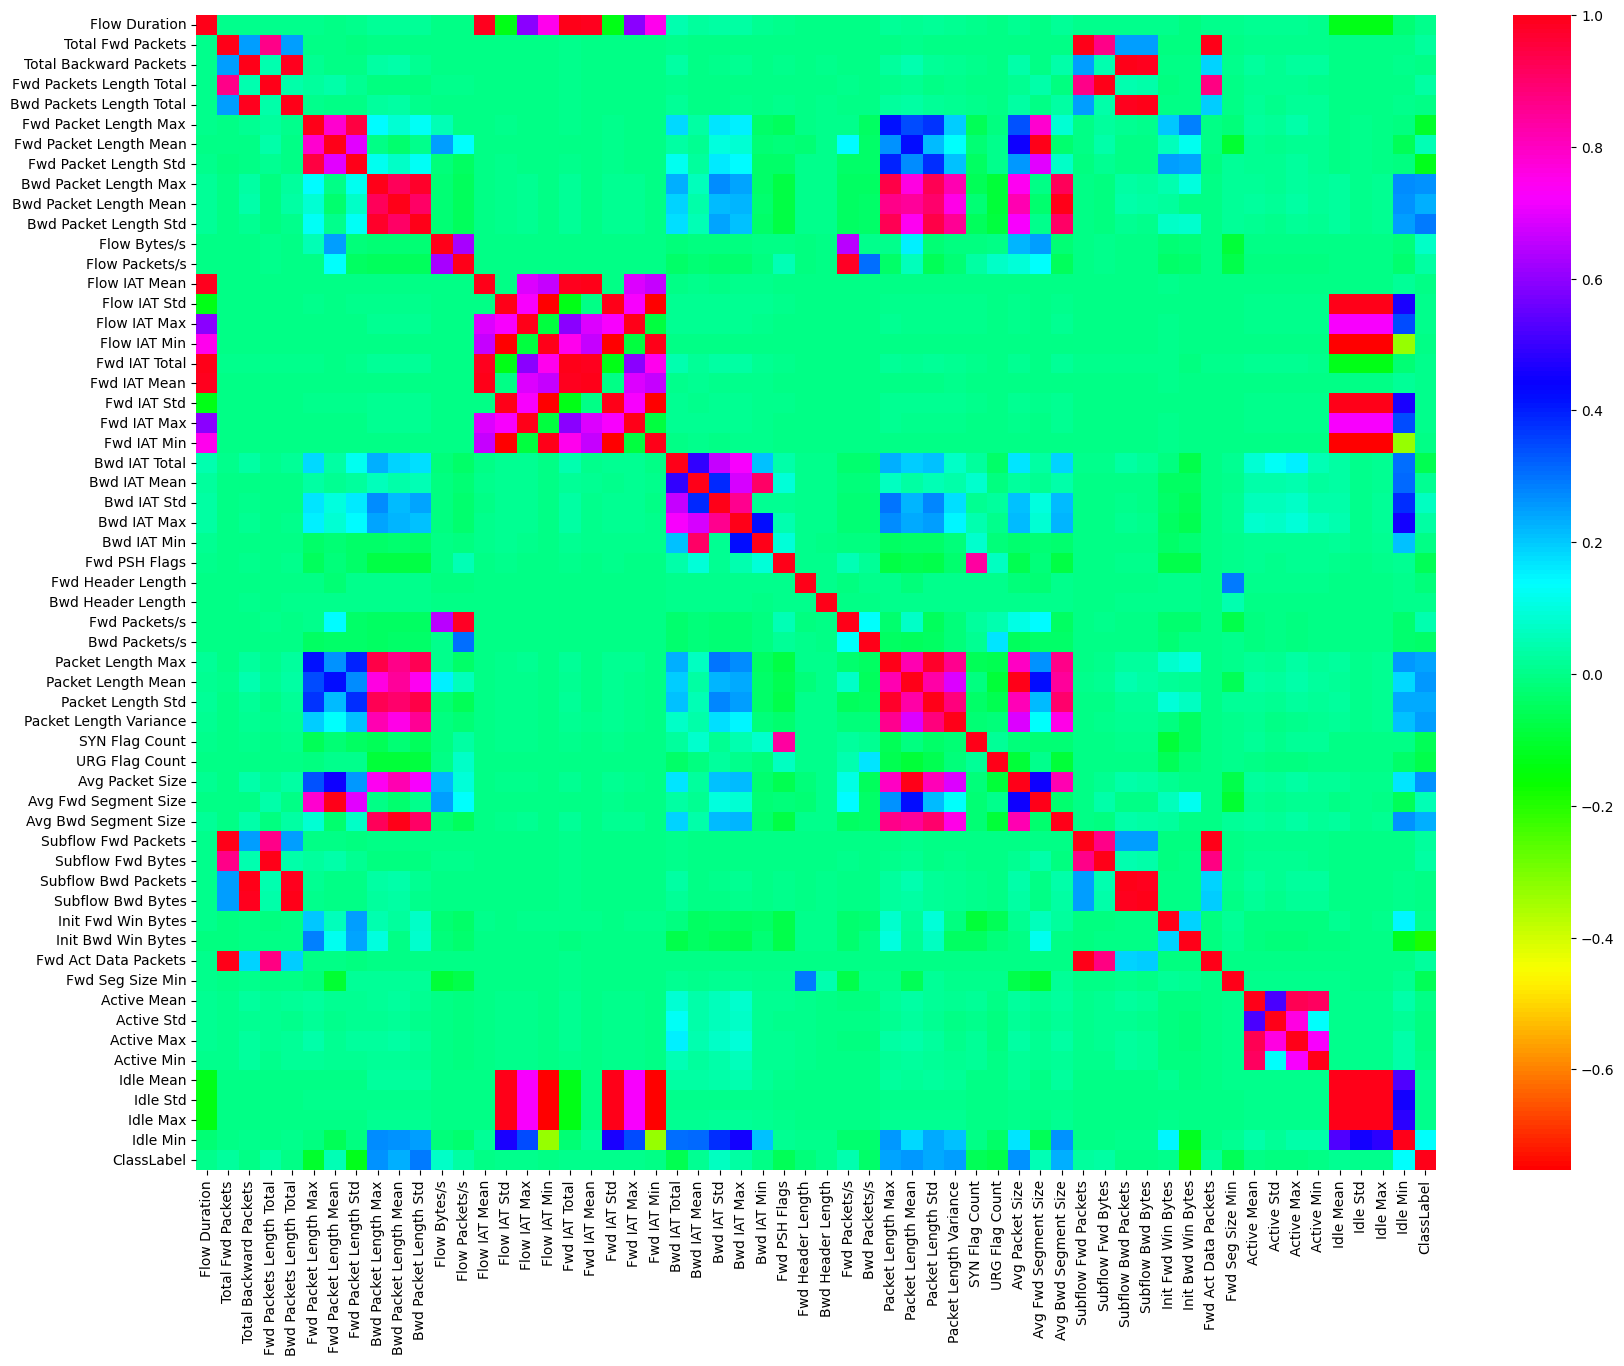

In [9]:
common.show_feature_correlation(all_df)